In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [79]:
#画像読み込み
#_background= cv2.imread('images/background_2.jpg',cv2.IMREAD_UNCHANGED)
_background= cv2.imread('images/lena.jpg')
_tzuyu = cv2.imread('images/tzuyu_4.png',cv2.IMREAD_UNCHANGED)#アルファチャンネル込みで
#_tzuyu = cv2.imread('images/star.png',cv2.IMREAD_UNCHANGED)#アルファチャンネル込みで

print(background.shape)
print(tzuyu.shape)
#cv2.imwrite('images/tzuyu_100.png',tzuyu)

(520, 520, 3)
(392, 229, 3)


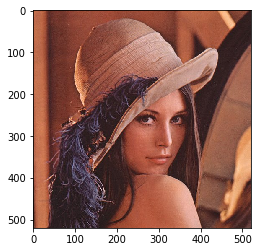

In [80]:
plt.imshow(background)

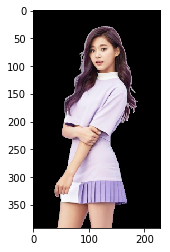

In [81]:
plt.imshow(tzuyu)

In [83]:
width, height = tzuyu.shape[:2]

#すべての行，列を抽出
mask = tzuyu[:,:,2]  # アルファチャンネルだけ抜き出す。
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)  # 3色分に増やす。
mask = mask / 255.0  # 0-255だと使い勝手が悪いので、0.0-1.0に変更。
tzuyu = tzuyu[:,:,:3]  # アルファチャンネルは取り出しちゃったのでもういらない。
print(mask.shape)
mask=mask.astype(np.uint8)
print("mask"+str(mask.dtype)+str(mask.shape))
print("tzuyu"+str(tzuyu.dtype)+str(tzuyu.shape))
print("background"+str(background.dtype)+str(background.shape))

background[0:height:, 0:width] *= 1 - mask  # 透過率に応じて元の画像を暗くする。
background[0:height:, 0:width] += tzuyu * mask  # 貼り付ける方の画像に透過率をかけて加算。
#plt.imshow(background)

(392, 229, 3)
maskuint8(392, 229, 3)
tzuyuuint8(392, 229, 3)
backgrounduint8(520, 520, 3)


ValueError: operands could not be broadcast together with shapes (229,392,3) (392,229,3) (229,392,3) 

In [170]:
x_offset=100
y_offset=100
# background[上のy座標:下のy座標, 左のx座標:右のx座標]にtzuyuを入れる
background[y_offset:y_offset+tzuyu.shape[0], x_offset:x_offset+tzuyu.shape[1]] = tzuyu
plt.imshow(background)


ValueError: could not broadcast input array from shape (392,229,3) into shape (392,229,4)

In [72]:
h, w = tzuyu.shape[:2]  # 前景画像の大きさ
x, y = 100, 200  # 背景画像の座標上で前景画像を貼り付ける位置
roi = background[y:y + h, x:x + w, :]
result = np.where(mask==255, tzuyu, roi)

imshow(result)

NameError: name 'mask' is not defined